# Elements of Statistics, Econometrics and Time Series Analysis
## Home assignment 2
### Anastasiia Kasprova

## Problem 3: Regression analysis - artificial data 
The objective of this problem is to assess the sensitivity of the linear regression to various
violations in the assumptions via simulations.

##### 1. First, we simulate the explanatory variables. To impose a specific type of dependence among the regressors, we simulate the $i$-th vector of observations $x_{i}$ = ($x_{1i}$..., $x_{Ji}$)' from a multivariate normal distribution with mean vector (10, 100, 1000) and the correlation matrix given by a $J×J$-Toelitz matrix with parameter $ρ$. Set $J = 3$, $ρ = 0.3$. The sample size equals $n = 200$.

In [305]:
#install.packages("mvrnorm")
require(MASS)
set.seed(888) #set reproducible sample generation
X <- mvrnorm(n=200,mu=c(10,100,1000),Sigma=toeplitz(0.3^(0:2)))
head(X)

9.084444,97.92909,999.0472
10.399214,98.08490,998.4733
11.444927,100.69418,999.3561
10.336983,100.27738,998.6696
8.326870,98.63270,999.5905
10.022283,99.25713,1000.3435


###### 2. Generate a sample of residuals $ε_{i}$ $i$ = 1,...,n from the normal distribution with zero mean and variance $σ^{2}$=1. Compute the pseudo-dependent variables $$ y_{i}=β_{0}+β_{1}x_{1i}+···+β_{J}x_{Ji}+ε_{i},$$ by setting the parameters for simplicity to $β_{0} = 1, β_{1} = 0.1, β_{2} = 0.01$ and $β_{3} = 0.001.$ Now you have **Y** and **X**.


In [306]:
B <- matrix(c(1,0.1,0.01,0.001)) #vector of betas
X_ext <- cbind(rep(1,n=200),X) #adding x0=1 to X
E <- rnorm(n=200, mean=0, sd=1) #a sample of residuals ε
Y <- X_ext%*%B + E 

In [307]:
head(bind_cols(data.frame(X), data.frame(Y)))

X1,X2,X3,Y
9.084444,97.92909,999.0472,4.778001
10.399214,98.08490,998.4733,4.497513
11.444927,100.69418,999.3561,4.220939
10.336983,100.27738,998.6696,4.146566
8.326870,98.63270,999.5905,4.112899
10.022283,99.25713,1000.3435,3.129472


In [308]:
dim(X)

[1] 200   3

##### 3. Estimate the linear regression model using OLS (ordinary least squares). Compare the parameters to the true values. Check their significance and assess the goodness of the model.


In [309]:
#slides p.217
#require("dplyr")
model <- lm(Y~., data = bind_cols(data.frame(X), data.frame(Y)))
#plot(model, which=1:4)
#coef(model)
summary(model)


Call:
lm(formula = Y ~ ., data = bind_cols(data.frame(X), data.frame(Y)))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33091 -0.62558 -0.04755  0.67432  2.67792 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 182.36702   76.17305   2.394   0.0176 *
X1            0.03179    0.06900   0.461   0.6456  
X2            0.02099    0.07682   0.273   0.7849  
X3           -0.18082    0.07921  -2.283   0.0235 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9211 on 196 degrees of freedom
Multiple R-squared:  0.03027,	Adjusted R-squared:  0.01543 
F-statistic:  2.04 on 3 and 196 DF,  p-value: 0.1097


Conclusions. 
Our true parameters are b1=0.1, b2=0.01 and b3=0.001. Based on summary information our predicted parameters b1' is in range [-0.03721;0.10079], b2' is in range [-0.05583; 0.09781], b3' is in range [-0.26003;-0.10161]. Thus the first two parameters belong to the confident intervals, however the third one is out of range as well as intersept.
Adjusted R-squared value is telling us that the model is fitting the actual data not so well.  


##### 4. Next we check the sensitivity of the regression model to the setup parameters. Increase the sample size n, say to 2000, and compare the results (the parameters and their variances) to the true values

In [294]:
set.seed(888) #set reproducible sample generation
X2 <- mvrnorm(n=2000,mu=c(10,100,1000),Sigma=toeplitz(0.3^(0:2)))
B <- matrix(c(1,0.1,0.01,0.001)) #vector of betas
X_ext2 <- cbind(rep(1,n=2000),X2) #adding x0=1 to X
E2 <- rnorm(n=2000, mean=0, sd=1) #a sample of residuals ε
Y2 <- X_ext2%*%B + E2 
model2 <- lm(Y2~., data = bind_cols(data.frame(X2), data.frame(Y2)))
#coef(model2)
summary(model2)


Call:
lm(formula = Y2 ~ ., data = bind_cols(data.frame(X2), data.frame(Y2)))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7447 -0.6673 -0.0328  0.6563  3.6082 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.509028  22.863515  -1.028    0.304    
X1            0.093132   0.023665   3.935 8.59e-05 ***
X2           -0.008093   0.024794  -0.326    0.744    
X3            0.027401   0.023418   1.170    0.242    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.006 on 1996 degrees of freedom
Multiple R-squared:  0.008993,	Adjusted R-squared:  0.007504 
F-statistic: 6.038 on 3 and 1996 DF,  p-value: 0.0004324


Conclusion.
All true value parameters belong to confident intervals of their estimated values despite the fact that standart errors are decreased in about 3 times.
True values: 1,0.1,0.01 and 0.001
Estimated values: -24, 0.1,-0.01 and 0.027 (brought to the same order)
Adjusted R-squared parameter is telling us that the model is not good too:D

##### 5. By increasing ρ you render multicollinearity in the data, i.e. the regressors become more correlated and the model cannot identify the individual effects. Set ρ = 0.8 with n = 200. Repeat steps 2 and 3. Compare the results and discuss what do you observe.

In [301]:
set.seed(888) #set reproducible sample generation
X3 <- mvrnorm(n=200,mu=c(10,100,1000),Sigma=toeplitz(0.8^(0:2)))
B <- matrix(c(1,0.1,0.01,0.001)) #vector of betas
X_ext3 <- cbind(rep(1,n=200),X3) #adding x0=1 to X
E3 <- rnorm(n=200, mean=0, sd=1) #a sample of residuals ε
Y3 <- X_ext3%*%B + E3 
model3 <- lm(Y3 ~ ., data = bind_cols(data.frame(X3), data.frame(Y3)))
summary(model)
summary(model3)


Call:
lm(formula = Y ~ ., data = bind_cols(data.frame(X), data.frame(Y)))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33091 -0.62558 -0.04755  0.67432  2.67792 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 182.36702   76.17305   2.394   0.0176 *
X1            0.03179    0.06900   0.461   0.6456  
X2            0.02099    0.07682   0.273   0.7849  
X3           -0.18082    0.07921  -2.283   0.0235 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9211 on 196 degrees of freedom
Multiple R-squared:  0.03027,	Adjusted R-squared:  0.01543 
F-statistic:  2.04 on 3 and 196 DF,  p-value: 0.1097



Call:
lm(formula = Y3 ~ ., data = bind_cols(data.frame(X3), data.frame(Y3)))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33091 -0.62558 -0.04755  0.67432  2.67792 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 122.2357   112.7599   1.084   0.2797  
X1            0.1324     0.1084   1.222   0.2233  
X2            0.2762     0.1622   1.703   0.0901 .
X3           -0.1472     0.1239  -1.188   0.2363  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9211 on 196 degrees of freedom
Multiple R-squared:  0.0836,	Adjusted R-squared:  0.06957 
F-statistic:  5.96 on 3 and 196 DF,  p-value: 0.0006572


Conclusion. By increasing $\rho$ we observe the increase of standart error thus the confident interval becomes wider as well as adjusted R-squared parameter becomes bigger. Also t-values are converging to some value which is far away from 0.05.

##### 6. Compute the confidence intervals for the estimated parameters for small/large sample sizes and for high/low values of ρ. Discuss the results and provide short theoretical justification for the evidence you found.

In [281]:
confint(model)

,2.5 %,97.5 %
(Intercept),32.1430059,332.59104279
X1,-0.1043005,0.16787188
X2,-0.1305015,0.17248707
X3,-0.3370427,-0.02460115


In [282]:
confint(model2)

,2.5 %,97.5 %
(Intercept),-68.34788349,21.32982657
X1,0.04672002,0.13954311
X2,-0.05671795,0.04053158
X3,-0.01852434,0.07332630


In [283]:
confint(model3)

,2.5 %,97.5 %
(Intercept),-100.14272145,344.61404183
X1,-0.08132270,0.34613044
X2,-0.04360924,0.59607392
X3,-0.39164167,0.09720027


Conclusion:
Model1 - intercept and third parameter are out of confident intervals.
Model2 and Model3 - all the true value parameters belong to confident intervals. Since the varience of values in model3 is higher (bigger standart error, wider confident intervals), model2 shows best fit (model with the biggest sample size). 

##### 7. How would you proceed if you wish to decide which of the explanatory variables is most important for y? Motivate your ideas.

Conclusion:
I would proceed with t-test, which indicates if $X_{j}$ has a significant impact on $Y$. 

##### 8. Now assume that you forget the last variable X3 and estimate the model just with X1 and X2. What should happen from theoretical perspective? What can you infer from the estimation results if you set ρ = 0.1 and ρ = 0.8. What is the theoretical reasoning for this effect?

In [303]:
set.seed(888) #set reproducible sample generation
X4 <- mvrnorm(n=200,mu=c(10,100,1000),Sigma=toeplitz(0.1^(0:2)))
B <- matrix(c(1,0.1,0.01,0.001)) #vector of betas
X_ext4 <- cbind(rep(1,n=200),X4) #adding x0=1 to X
E4 <- rnorm(n=200, mean=0, sd=1) #a sample of residuals ε
Y4 <- X_ext4%*%B + E4 
model4 <- lm(Y4 ~ X1 + X2, data = bind_cols(data.frame(X4), data.frame(Y4)))


In [302]:
set.seed(888) #set reproducible sample generation
X5 <- mvrnorm(n=200,mu=c(10,100,1000),Sigma=toeplitz(0.8^(0:2)))
B <- matrix(c(1,0.1,0.01,0.001)) #vector of betas
X_ext5 <- cbind(rep(1,n=200),X5) #adding x0=1 to X
E5 <- rnorm(n=200, mean=0, sd=1) #a sample of residuals ε
Y5 <- X_ext5%*%B + E5 
model5 <- lm(Y5 ~ X1 + X2, data = bind_cols(data.frame(X5), data.frame(Y5)))

In [304]:
summary(model4)
summary(model5)


Call:
lm(formula = Y4 ~ X1 + X2, data = bind_cols(data.frame(X4), data.frame(Y4)))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33356 -0.64316 -0.05416  0.72583  2.61100 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -16.10530    7.27446  -2.214  0.02798 * 
X1            0.06343    0.07090   0.895  0.37205   
X2            0.19428    0.07441   2.611  0.00973 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9219 on 197 degrees of freedom
Multiple R-squared:  0.04694,	Adjusted R-squared:  0.03726 
F-statistic: 4.851 on 2 and 197 DF,  p-value: 0.008777



Call:
lm(formula = Y5 ~ X1 + X2, data = bind_cols(data.frame(X5), data.frame(Y5)))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33464 -0.64467 -0.01279  0.64155  2.67742 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -11.1435    10.3546  -1.076    0.283
X1            0.1433     0.1081   1.326    0.186
X2            0.1368     0.1120   1.221    0.223

Residual standard error: 0.9221 on 197 degrees of freedom
Multiple R-squared:  0.077,	Adjusted R-squared:  0.06763 
F-statistic: 8.217 on 2 and 197 DF,  p-value: 0.0003736


Conclusion: By increasing ρ we render multicollinearity in the data, i.e. the regressors become more correlated and the model cannot identify the individual effects and here we can add all the conclusions from 3.5 that t-values become far from 0.05 and standart errors increase.

By reducing the number of variables leaving only $X_{1}$ and $X_{2}$, decrese intersept value (b0 parameter), as well as all other parameters. From teoretical perspective, too simple model gives us high bias and too complex model gives us high variance. Thus by reducing the number of variables in our model we decrease the variance and make bias be higher.

## Problem 4: Linear regression analysis - real data

In the light of the hot discussion on the educational system in Ukraine we consider here a data set on student performance at two schools in Portugal. The data set can be downloaded at
http://archive.ics.uci.edu/ml/datasets/Student+Performance

The zip-file contains some personal information and the grades in Mathematics (student-mat.csv) and Portuguese language (student-por.csv). Pick up the file for Math. The variable of interest is the final grade coded as G3. The remaining variables are used as explanatory variables. Hereafter we exclude G1 and G2 from the discussion and the analysis!


In [1]:
df <- read.csv("E:/UCU/statistics/practice/student-mat.csv", sep = ";")
drops <- c("G1","G2")
df <- df[ , !(names(df) %in% drops)]

In [2]:
head(df)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10
GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,15


In [372]:
dim(df)

[1] 395  31

In [321]:
names(df)

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G3"

In [3]:
str(df)

'data.frame':	395 obs. of  31 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

##### 1. Without having a closer look at the data run a simple linear regression of G3 on all other variables (function lm). Look at the list produced by summary and compare the variables used by R with the original data. Explain what happens behind the curtain (discuss, for example, the variable Mjob).

In [4]:
model <- lm(G3~.,data=df)
summary(model)


Call:
lm(formula = G3 ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0442  -1.9028   0.4289   2.7570   8.8874 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      14.07769    4.48089   3.142  0.00182 ** 
schoolMS          0.72555    0.79157   0.917  0.35997    
sexM              1.26236    0.50003   2.525  0.01202 *  
age              -0.37516    0.21721  -1.727  0.08501 .  
addressU          0.55135    0.58412   0.944  0.34586    
famsizeLE3        0.70281    0.48824   1.439  0.15090    
PstatusT         -0.32010    0.72390  -0.442  0.65862    
Medu              0.45687    0.32317   1.414  0.15833    
Fedu             -0.10458    0.27762  -0.377  0.70663    
Mjobhealth        0.99808    1.11819   0.893  0.37268    
Mjobother        -0.35900    0.71316  -0.503  0.61500    
Mjobservices      0.65832    0.79784   0.825  0.40985    
Mjobteacher      -1.24149    1.03821  -1.196  0.23257    
Fjobhealth        0.34767    1

Conclusion: For each categorical variable R did for us one-hot encoding procedure - created additional dummy variables(equals to the number of distinct values of this variable) and deleted the original one.
If we take a look at Mjob in the original dataset, we will find that this column contains the following 5 distinct values: "teacher", "health", "services", "at_home" and "other". After we had applied lm() function, R droped the original column, but created 4 new ones: Mjobhealth, Mjobother, Mjobservices and Mjobteacher assinging them some values. However if we look closer it did not create dummy variable for each first in ascending order factor names - for instance there is no newly created variable containing "%at_home", "%course", "%father" etc.

##### 2. Analyse the significance of the explanatory variables. If, for example, Mjobhealth is insignificant, obviously you cannot simply drop it from the model. You have to check the simultaneous insignificance of all dummies which stem from the factor variable MJob (general linear hypothesis). Run such tests for all relevant variables and conclude about the significance of the corresponding variables.

In [120]:
# Let's build a matrix 'cm', where each row specifies a linear combination of the coefficients

# Number of columns - length(coefficients(model)) # 40
# Number of rows - number of "Mjob%" columns in model
M = matrix(0,nrow=4,ncol=length(coefficients(model)))

# assign the rownames to our columns
colnames(M) <-  rownames(summary(model)$coefficients[,])

M[,"Mjobhealth"] <- c(1,0,0,0)
M[,"Mjobother"] <- c(0,1,0,0)
M[,"Mjobservices"] <- c(0,0,1,0)
M[,"Mjobteacher"] <- c(0,0,0,1)

# check how looks our newly created matrix 'cm'
t(M)

(Intercept),0,0,0,0
schoolMS,0,0,0,0
sexM,0,0,0,0
age,0,0,0,0
addressU,0,0,0,0
famsizeLE3,0,0,0,0
PstatusT,0,0,0,0
Medu,0,0,0,0
Fedu,0,0,0,0
Mjobhealth,1,0,0,0
Mjobother,0,1,0,0


In [121]:
# running general linear hypothesis test assuming
# H0 hypothesis - all "Mjob%" = 0
# H1 - one of them is not 0 
library(gmodels)
glh.test(model, cm = M, d = rep(0,4))


	 Test of General Linear Hypothesis 	
Call:
glh.test(reg = model, cm = M, d = rep(0, 4))
F = 2.4231, df1 =   4, df2 = 355, p-value = 0.04794 


In [122]:
summary(glh.test(model, cm = M, d = rep(0,4)))


	 Test of General Linear Hypothesis 	
Regression:  model 

Null Hypothesis: C %*% Beta-hat = d 

C matrix: 
     (Intercept) schoolMS sexM age addressU famsizeLE3 PstatusT Medu Fedu
[1,]           0        0    0   0        0          0        0    0    0
[2,]           0        0    0   0        0          0        0    0    0
[3,]           0        0    0   0        0          0        0    0    0
[4,]           0        0    0   0        0          0        0    0    0
     Mjobhealth Mjobother Mjobservices Mjobteacher Fjobhealth Fjobother
[1,]          1         0            0           0          0         0
[2,]          0         1            0           0          0         0
[3,]          0         0            1           0          0         0
[4,]          0         0            0           1          0         0
     Fjobservices Fjobteacher reasonhome reasonother reasonreputation
[1,]            0           0          0           0                0
[2,]            0    

Conclusion: Since our p-value = 0.04794 (almost 0.05.. but still < 0.05), we can reject H0 hypothesis, and state that there is at least one "Mjob%" dummy variable which has an impact on G3. 

##### 3. Now look at the variable goout and its possible values. Does a similar discussion applies as in the case of Mjob and why or why not?

Conclusion: In the original dataset Mjob is nominal (possible values: "teacher", "health", "services", "at_home" and "other") and goout is numerical (possible values are integers from 1 to 5). Thus R treats them differently. To be able to apply the similar discussion we need to convert goout to factor.

##### 4. Provide an economic interpretation for the parameters of absences and goout. What is the economic interpretation of Mjobhealth? Pay attention to the possible values of Mjob (and neglect the possible insignificance).

In [138]:
summary(model)$coefficients[c("absences",
                              "goout",
                              "Mjobhealth",
                              "Mjobother",
                              "Mjobservices",
                              "Mjobteacher"),]

,Estimate,Std. Error,t value,Pr(>|t|)
absences,0.05629147,0.02896648,1.9433317,0.052766170
goout,-0.59367096,0.22450666,-2.6443357,0.008548492
Mjobhealth,0.99808262,1.11818583,0.8925910,0.372680877
Mjobother,-0.35900225,0.71316331,-0.5033942,0.614999372
Mjobservices,0.65832172,0.79783889,0.8251311,0.409851249
Mjobteacher,-1.24149043,1.03820870,-1.1958004,0.232572563


Conclusion.

##### 5. Compute the 95% confidence interval for the parameter of absences and provide its economic meaning.

In [124]:
myconfint <- confint(model)
myconfint[rownames(myconfint)=="absences",]

2.5 %       97.5 % 
-0.000675997  0.113258940

Conclusion: 95% of all the students have the value of absence parameter from -0.00068 to 0.11326.

##### 6. Many of the variable appear insignificant and we should find the smallest model, which still has a good explanatory power. Choose this model using stepwise model selection (stepAIC). Work with this model in all the remaining steps.


In [331]:
small_model <- stepAIC(model, trace=F)
summary(small_model)


Call:
lm(formula = G3 ~ sex + age + famsize + Medu + Mjob + studytime + 
    failures + schoolsup + famsup + romantic + freetime + goout + 
    absences, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5100  -1.6786   0.3531   2.8716   8.8976 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.67213    3.24697   4.211 3.18e-05 ***
sexM          0.96171    0.46086   2.087  0.03758 *  
age          -0.28634    0.18073  -1.584  0.11395    
famsizeLE3    0.72802    0.46407   1.569  0.11754    
Medu          0.55202    0.25917   2.130  0.03382 *  
Mjobhealth    1.47081    1.01230   1.453  0.14707    
Mjobother    -0.18623    0.66215  -0.281  0.77867    
Mjobservices  0.97452    0.73506   1.326  0.18572    
Mjobteacher  -0.84531    0.96459  -0.876  0.38140    
studytime     0.57107    0.26533   2.152  0.03200 *  
failures     -1.86045    0.30247  -6.151 1.96e-09 ***
schoolsupyes -1.27767    0.65077  -1.963  0.05034 .  
famsupyes    

##### 7. Sometimes data contains outliers which induces bias in the parameter estimates. Check for outliers using Cook’s distance.

In [381]:
#cooks.distance(small_model)

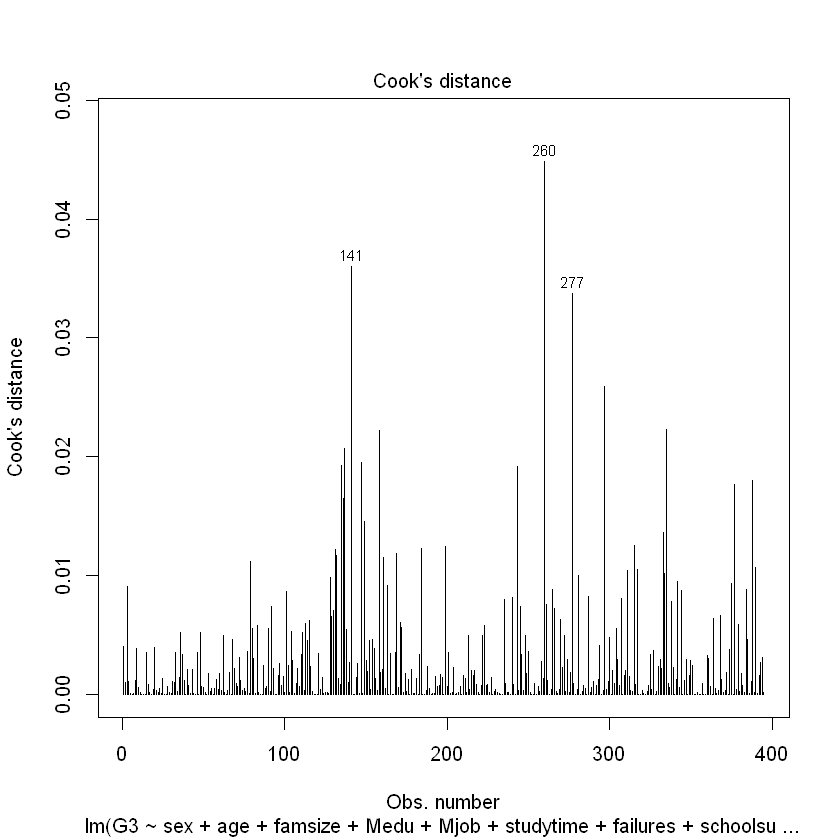

In [337]:
plot(small_model, which=4, cook.levels=cutoff)

Conclusion: From the graph above we can see that 141, 260 and 277 are outliers.

##### 8. Frequently data is missing. Imagine that for one student the value of absences is missing completely at random. How would you proceed methodologically to fill in this value? How would you proceed if the value of the binary variable higher is missing? Implementation is not required

Absences is a numeric variable containing integers from 1 to 10. Thus we could use either its avarage value or some random but typical.

Higher is a binary variable containing values "yes" and "no". To forecast its missing values we can use some regression model.

##### 9. Now we look at the model assumptions. The variable goout seems to be very significant. However, if we look at the residuals we observe that the variance of the residuals is very different for different values of goout. For each of the five values this variance equals:

In [342]:
unlist(lapply(c(1:5), function(x) var(model$residuals[df$goout==x])))

[1] 23.36422 14.25007 13.51584 14.82287 18.15092

##### Which of the model assumptions is violated here and how would you proceed to overcome this problem. Implementation is not required.

Conclusion: Homoscedasticity assumption is violated here, since the variance should be the same for all residuals (as per assumptions of the linear regression).
Here we should work probably with heteroskedasticity (if smaller residuals for small values of Xj and larger for large values of Xj), considering the new regression, for instance, GLS.

##### 10. Write a short summary with the pedagogical and political interpretation of the estimated model.


Young people should be motivated to attend the school, be always busy and work hard (considering absence, free time, study time, go out, age). But the motivation should be not about good marks but about the posibility to achieve the higher level of life, increase the life quality and getting success. It will decrease the level of absence and failures without any doubts. From the other side absence could be caused by healthcare issues, thus it is a countrywise problem to provide kids with the environment where they could get all necessary nutritions while growing as well as good sport training at least at school.

##### 11. An important issue is forecasting. Split the data into two parts. For comparability of the results take the first 300 observations as training data and the remaining 78 as test data set. Using the stepwise model selection procedure from above find the optimal model for the training data set. Compute the prediction for the test data set and calculate appropriate loss functions (MSE, MAE). Store them for comparison with other modeling techniques.


In [375]:
dim(df)

[1] 395  31

seems like I have more observations in the dataset..

In [379]:
set.seed(888)
k <- sample.int(dim(df)[1],300)
train <- df[k,]
test  <- df[-k,]
model <- lm(G3~.,data=train)
best_model <- stepAIC(model, trace=F)

In [380]:
summary(best_model)


Call:
lm(formula = G3 ~ sex + age + address + Medu + Mjob + studytime + 
    failures + famsup + romantic + freetime + goout + absences, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.7011  -1.9520   0.5466   2.8023   8.9803 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.56572    3.66823   3.426 0.000704 ***
sexM          1.40409    0.53671   2.616 0.009370 ** 
age          -0.30609    0.20284  -1.509 0.132415    
addressU      1.24546    0.60317   2.065 0.039845 *  
Medu          0.55674    0.30893   1.802 0.072581 .  
Mjobhealth    0.28036    1.20476   0.233 0.816153    
Mjobother    -1.11869    0.79958  -1.399 0.162877    
Mjobservices  0.27193    0.88939   0.306 0.760016    
Mjobteacher  -1.70471    1.13682  -1.500 0.134845    
studytime     0.74269    0.31721   2.341 0.019909 *  
failures     -2.11689    0.35838  -5.907 9.95e-09 ***
famsupyes    -0.88788    0.50790  -1.748 0.081522 .  
romanticyes  -0.81466 

In [383]:
#predict(model,test, interval="predict")

In [ ]:
#require("metrics")
mae(actual, predicted)
mse(actual, predicted)

In [369]:
dim(df[2])

[1] 395   1

## Problem 5: Regression techniques

#### 1. In this problem we will apply several alternative modeling techniques to the student performance data from the above problem.

##### (a) First we model the grade G3 as a function of absences in a nonparametric way. Fit a Nadaraya-Watson regression to the data with Gaussian kernel and “optimal” bandwidth. Make a plot which shows the data and the estimated curve. Compute the variance of the residuals (or $R^2$ if you wish) and compare it to its counterpart from a simple univariate regression.


##### (b) Next we perform model selection via the lasso regression instead of the stepwise procedure based on AIC as above. Run the lasso regression in R and compare the result with the results from the stepwise selection.

##### (c) Now we model the the grade G3 using CART. Estimate a pruned tree for the training data set. Compute the forecasts for the test data test and calculate the loss functions. Compare the results with the results the linear regression. Which variables appear to be most important from the point of view of CART? Is this consistent with the conclusions from the LR?

##### (d) Pick up either the lasso or CART approach and run several tests for equal predictive ability to compare this method to the LR (sign test, sign rank test, DieboldMariano test). Remember to use test data set for this purpose.


#### 2. A student passes a course if he/she achieves more than 10 points. This implies that we can use the G3 variable to group the students into two categories: 
$$Y_{i} = \{\begin{array}
{rrr}
1,  if G3i > 10 \\
0,  if G3i ≤ 10
\end{array}
$$

#### In the remaining we concentrate on classification techniques and use Y as the dependent variable.

##### (a) Fit a logistic regression to the data. Use all explanatory variables except for G1, G2 and G3. Run a similar stepwise model selection using AIC as criterion. Below consider only the optimal model chosen here.

##### (b) Consider the explanatory variable goout. Obviously its parameter cannot be intepreted in the same way as for a linear regression. Provide the correct intepretation using odds

##### (c) Randomly pick up five students. Determine and discuss their probabilities of passing and failing the course. If you want to predict passing/failing the exam for a particular student, what is the simplest way to proceed using these probabilities?


##### (d) Compute the classification table and calculate the specifity and sensitivity. Provide verbal interpretation for the elements of the classification table and the performance measures.


##### (e) To improve the performance it makes sense to change the threshold used for classification. This can be done using the ROC curve. Plot this curve and determine the optimal threshold.

##### (f) Recompute the classification table, sensitivity and specifity for the new threshold. Compare the results with the original values. Is the procedure now more strict/conservative?